# Template Matching

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
puppy = cv2.imread('data/puppy.jpg')
puppy_show = cv2.cvtColor(puppy, cv2.COLOR_BGR2RGB)

puppy_face = cv2.imread('data/Puppy-face.jpg')
puppy_show_face = cv2.cvtColor(puppy_face, cv2.COLOR_BGR2RGB)

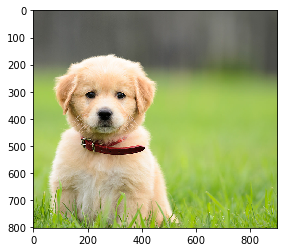

In [3]:
plt.imshow(puppy_show, cmap = 'gray')

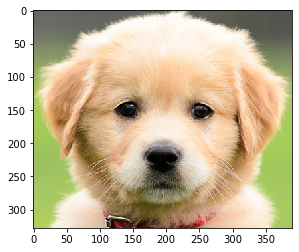

In [4]:
plt.imshow(puppy_show_face)

In [5]:
print("shape of Puppy",puppy.shape)
print("shape of Puppy face",puppy_face.shape)

shape of Puppy (802, 900, 3)
shape of Puppy face (328, 390, 3)


In [15]:
# width and height of the template
h,w,c = puppy_show_face.shape

print('w = ',w)
print('h = ',h)

w =  390
h =  328


In [17]:
# All the 6 method for camparison in a list

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

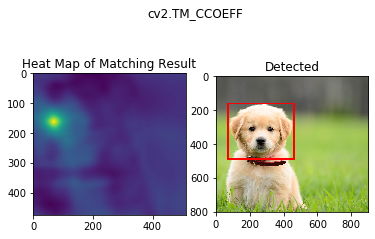

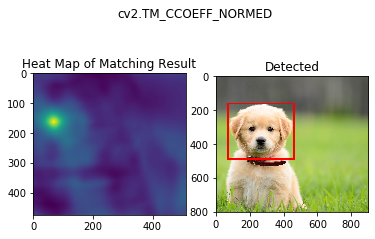

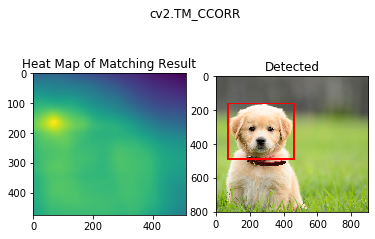

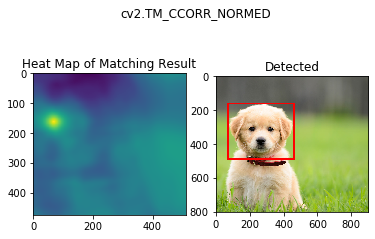

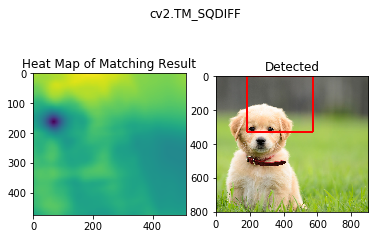

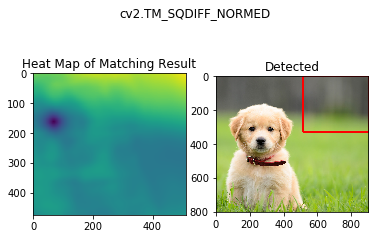

In [19]:
for meth in methods:
    img = puppy_show.copy()
    method = eval(meth)
    
    #apply template matching
    res = cv2.matchTemplate(img,puppy_show_face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM SQIFF of TM SQDIFF Normed, take minimum
    if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0]+w, top_left[1]+h)
    
    cv2.rectangle(img,top_left,bottom_right,(255,0,0),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heat Map of Matching Result')
    
    plt.subplot(122)
    plt.imshow(img)
    plt.title('Detected')
    
    plt.suptitle(meth)
    
    plt.show()
    print('\n')
    print('\n')

    